# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#loading data
data = pd.read_csv("dataset/train.csv")

# Inspecting Data

In [3]:
data.columns

Index(['ID', 'TARGET_LifeExpectancy', 'Country', 'Year', 'Status',
       'AdultMortality', 'AdultMortality-Male', 'AdultMortality-Female',
       'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI',
       'UnderFiveDeaths', 'Polio', 'TotalExpenditure', 'Diphtheria',
       'HIV-AIDS', 'GDP', 'Population', 'Thinness1-19years',
       'Thinness5-9years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2071 non-null   int64  
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   InfantDeaths                  2071 non-null   int64  
 9   Alcohol                       2071 non-null   float64
 10  PercentageExpenditure         2071 non-null   float64
 11  Measles                       2071 non-null   int64  
 12  BMI                           2071 non-null   float64
 13  Und

In [5]:
data.shape

(2071, 24)

In [6]:
data

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,2067,47.7,61,2006,0,578,596,560,36,2.46,...,84,7.33,83.0,17.6,59.67,11731746,7.2,7.1,0.456,3.240370
2067,2068,46.0,61,2005,0,64,66,62,39,2.33,...,85,8.18,83.0,18.2,480.66,11421984,7.3,7.2,0.443,3.193744
2068,2069,46.2,61,2004,0,69,70,68,41,2.44,...,85,6.93,84.0,18.4,422.39,111249,7.4,7.3,0.433,3.162278
2069,2070,47.1,61,2003,0,611,574,648,43,2.61,...,86,6.56,85.0,18.6,423.67,1824125,7.4,7.4,0.424,3.130495


In [7]:
data.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


In [8]:
data.isnull().sum()

ID                              0
TARGET_LifeExpectancy           0
Country                         0
Year                            0
Status                          0
AdultMortality                  0
AdultMortality-Male             0
AdultMortality-Female           0
InfantDeaths                    0
Alcohol                         0
PercentageExpenditure           0
Measles                         0
BMI                             0
UnderFiveDeaths                 0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV-AIDS                        0
GDP                             0
Population                      0
Thinness1-19years               0
Thinness5-9years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

# Detecting outliers 

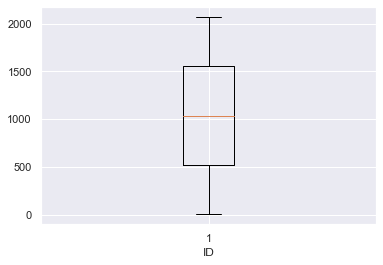

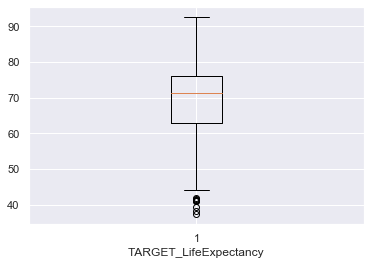

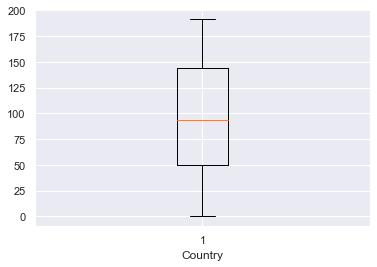

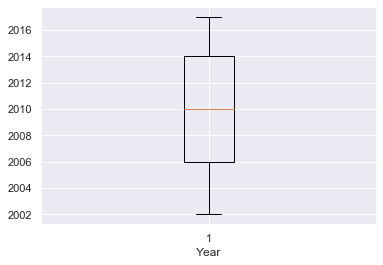

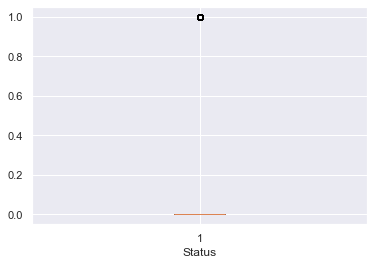

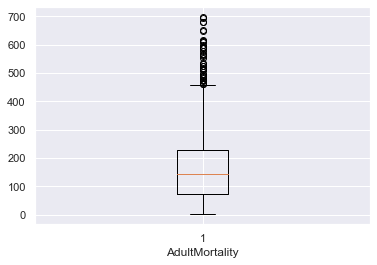

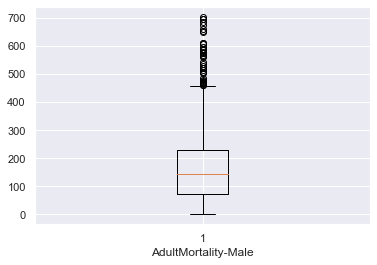

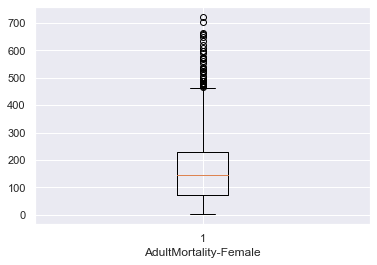

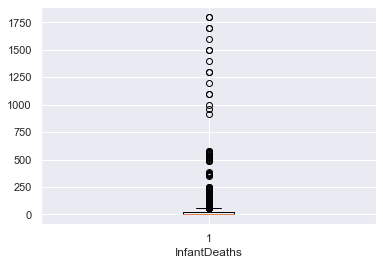

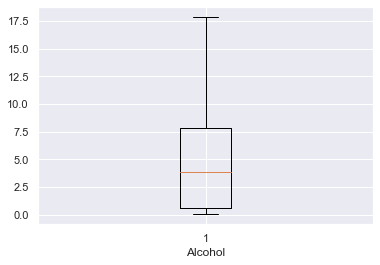

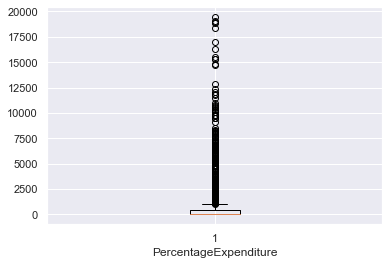

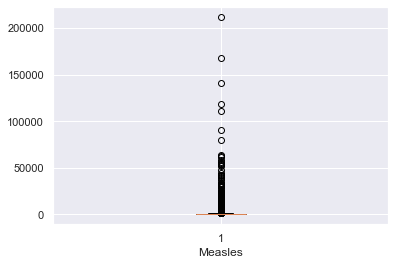

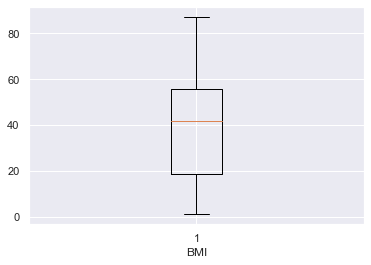

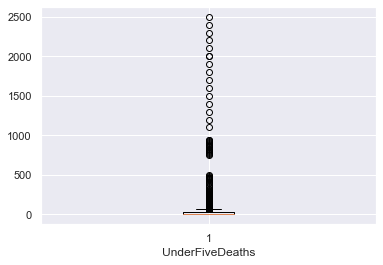

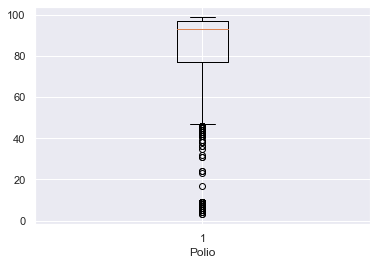

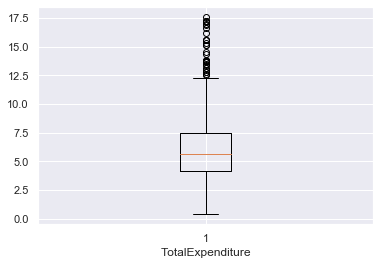

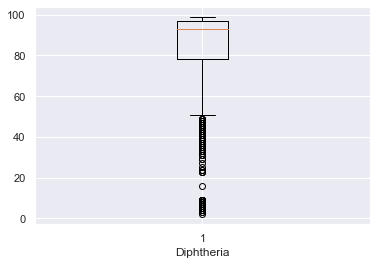

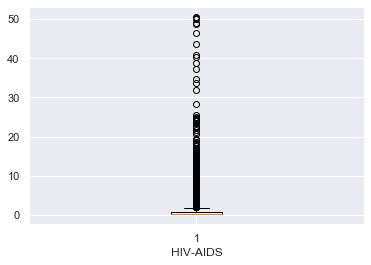

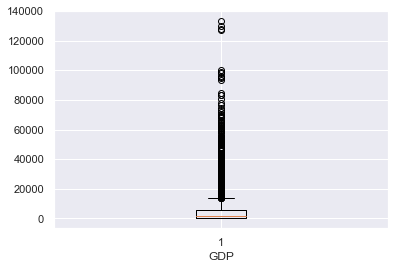

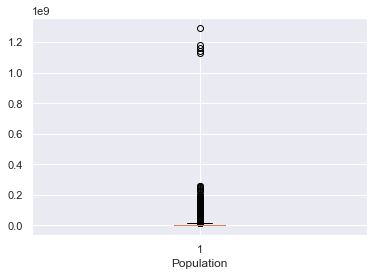

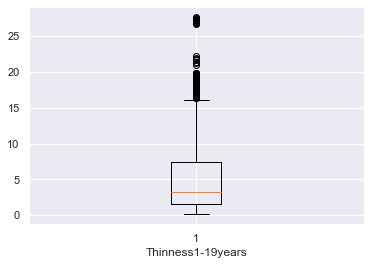

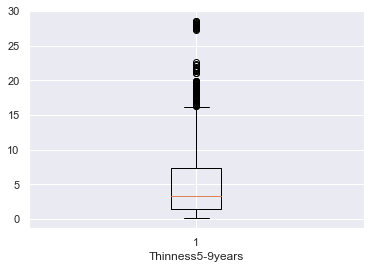

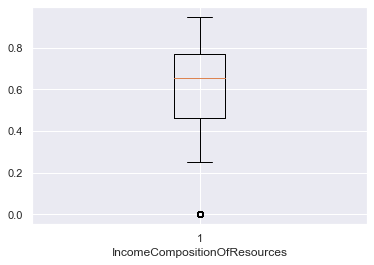

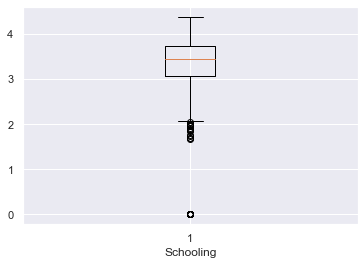

In [9]:
# detecting outliers through boxplot
for i in data.columns:
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

# Seperating input and output features

In [10]:
# features on which we are going to train our data
dataX = data.iloc[:,2:]

In [11]:
# expected outout feature
dataY = data['TARGET_LifeExpectancy']

In [12]:
print(dataX.shape)
print(dataY.shape)

(2071, 22)
(2071,)


# Train and Test set split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.30, random_state=42)

# Standardisation

In [14]:
standard_scaler = preprocessing.StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

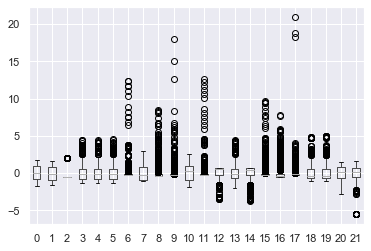

In [15]:
X_train = pd.DataFrame(X_train)
X_train.boxplot()

# Linear regression

In [16]:
# creating and training a linear regression model
model = LinearRegression().fit(X_train,y_train)

In [17]:
print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

Training score: 0.7653541168810418
Test score: 0.73206759648337


In [18]:
predicted = model.predict(X_test)

In [19]:
# testing through mean squared error
mae = mean_absolute_error(y_test, predicted)

In [20]:
print('Mean absolute error: {}'.format(mae))

Mean absolute error: 3.5752473745549436


# POLYNOMIAL REGRESSION

In [21]:
poly = PolynomialFeatures(2)

In [22]:
# transforming our sets
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [23]:
print(X_train.shape)
print(X_test.shape)

(1449, 276)
(622, 276)


In [24]:
print(y_train.shape)
print(y_test.shape)

(1449,)
(622,)


# Simple model

In [25]:
polymodel = linear_model.LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Training score: {}'.format(polymodel.score(X_train, y_train)))
print('Test score: {}'.format(polymodel.score(X_test, y_test)))

Training score: 0.9047819148884483
Test score: 0.5648712221848406


In [27]:
predicted = polymodel.predict(X_test)

In [28]:
mae1 = mean_absolute_error(y_test, predicted)

In [29]:
print('Mean absolute error: {}'.format(mae1))

Mean absolute error: 3.1412708785372914


# Applying L2 Regularisation using ridge model

Optimal regularization parameter for ridge model : 75


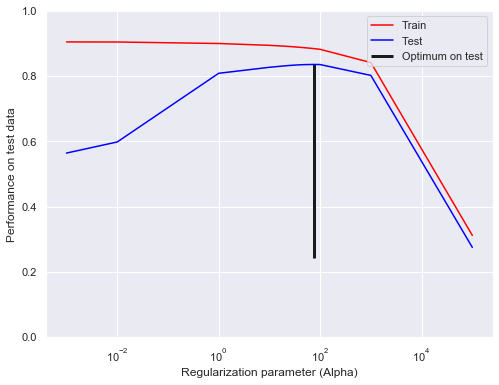

In [30]:
# generating and identifying best alpha

alphas = [0.001,0.01,1,10,20,25,26,27,28,29,30,31,32,33,34,35,40,50,60,70,72,74,75,76,80,85,90,100,1000,100000]
model = linear_model.Ridge(fit_intercept=True)
train_errors = list()
test_errors = list()
for alpha in alphas:
    model.set_params(alpha=alpha)
    model.fit(X_train, y_train)
    # adding scores to compare later
    train_errors.append(model.score(X_train, y_train))
    test_errors.append(model.score(X_test, y_test))

maxAccuracy = np.argmax(test_errors)
bestAlpha = alphas[maxAccuracy]

# Plotting data
plt.figure(figsize=(8,6))
plt.semilogx(alphas, train_errors, label='Train', color='red')
plt.semilogx(alphas, test_errors, label='Test', color='blue')
plt.vlines(bestAlpha, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([0, 1.0])
plt.xlabel('Regularization parameter (Alpha)')
plt.ylabel('Performance on test data')

print("Optimal regularization parameter for ridge model : %s" % bestAlpha)

In [31]:
# using alpha as 27 which is the best find

ridgemodel = linear_model.Ridge(alpha=75, fit_intercept=True)
ridgemodel.fit(X_train, y_train)

Ridge(alpha=75, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [32]:
print('Training score: {}'.format(ridgemodel.score(X_train, y_train)))
print('Test score: {}'.format(ridgemodel.score(X_test, y_test)))

Training score: 0.8841565485365511
Test score: 0.8355169350261873


In [33]:
predicted = ridgemodel.predict(X_test)

In [34]:
mae2 = mean_absolute_error(y_test, predicted)

In [35]:
print('Mean absolute error: {}'.format(mae2))

Mean absolute error: 2.749649391143768


# Applying L1 Regularisation Lasso model

/Users/syedhaider/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6676.837078118146, tolerance: 13.586788422360248
  positive)
/Users/syedhaider/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917.190125648518, tolerance: 13.586788422360248
  positive)
/Users/syedhaider/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.786944218452845, tolerance: 13.586788422360248
  positive)
/Users/syedhaider/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not c

Optimal regularization parameter for Lasso model : 0.04


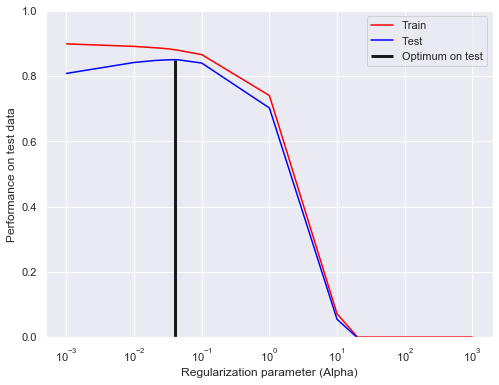

In [36]:
# generating and identifying best alpha

alphas = [0.001,0.01,0.02,0.024,0.025,0.026,0.027,0.03,0.035,0.04,0.045,0.1,1,10,20,30,40,50,100,1000]
model = linear_model.Lasso(fit_intercept=True)
train_errors = list()
test_errors = list()
for alpha in alphas:
    model.set_params(alpha=alpha)
    model.fit(X_train, y_train)
    # adding scores to compare later
    train_errors.append(model.score(X_train, y_train))
    test_errors.append(model.score(X_test, y_test))

maxAccuracy = np.argmax(test_errors)
bestAlpha = alphas[maxAccuracy]

# Plotting data
plt.figure(figsize=(8,6))
plt.semilogx(alphas, train_errors, label='Train', color='red')
plt.semilogx(alphas, test_errors, label='Test', color='blue')
plt.vlines(bestAlpha, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([0, 1.0])
plt.xlabel('Regularization parameter (Alpha)')
plt.ylabel('Performance on test data')

print("Optimal regularization parameter for Lasso model : %s" % bestAlpha)

In [37]:
# using alpha 0.026 as best parameter identified by our graph

lassomodel = linear_model.Lasso(alpha=0.04, fit_intercept=True)
lassomodel.fit(X_train, y_train)

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
print('Training score: {}'.format(lassomodel.score(X_train, y_train)))
print('Test score: {}'.format(lassomodel.score(X_test, y_test)))

Training score: 0.8806634684245571
Test score: 0.8501837882788352


In [39]:
predicted = lassomodel.predict(X_test)

In [40]:
mae3 = mean_absolute_error(y_test, predicted)

In [41]:
print('Mean absolute error: {}'.format(mae3))

Mean absolute error: 2.628834285034522


# Predicting test data values using our best model and generating file

In [42]:
# loading test and train data provided
TrainData = pd.read_csv("dataset/train.csv")
TestData = pd.read_csv("dataset/test.csv")

In [43]:
# removing IDs
TrainData = TrainData.iloc[:,1:]
TestData = TestData.iloc[:,1:]

In [44]:
# removing Y from X
TrainXdata = TrainData.iloc[:,1:]
TrainYdata = TrainData['TARGET_LifeExpectancy']

In [45]:
print(TrainXdata.shape)
print(TrainXdata.shape)
print(TestData.shape)

(2071, 22)
(2071, 22)
(867, 22)


In [46]:
standard_scaler = preprocessing.StandardScaler()
TrainXdata = standard_scaler.fit_transform(TrainXdata)
TestData = standard_scaler.transform(TestData)

In [47]:
poly = PolynomialFeatures(2)

In [48]:
TrainXdata = poly.fit_transform(TrainXdata)
TestData = poly.fit_transform(TestData)

In [49]:
lassomodel = linear_model.Lasso(alpha=0.04, fit_intercept=True)
lassomodel.fit(TrainXdata, TrainYdata)

/Users/syedhaider/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.76525263450458, tolerance: 18.612127386769675
  positive)


Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
TestPredicted = lassomodel.predict(TestData)

In [51]:
TestPredicted

array([59.30969583, 57.42849701, 57.24062634, 57.06198077, 56.94875492,
       56.12732448, 56.23456608, 55.61103443, 55.84699586, 54.17043945,
       54.00287012, 58.60432661, 58.37555663, 56.87397798, 58.99460671,
       58.63225103, 81.02091528, 82.22003005, 81.45617192, 81.36020754,
       81.14380378, 80.95797392, 80.77416523, 80.58621726, 80.11939156,
       79.96814502, 79.42842015, 81.23589928, 80.9254848 , 78.77098516,
       78.62974342, 80.05074295, 77.60449109, 79.41111902, 79.44421092,
       78.89029322, 79.54798301, 77.74891938, 77.65704221, 78.94232048,
       78.72092446, 76.21917679, 77.64014131, 77.20071963, 75.73133015,
       76.84597994, 75.24314496, 74.00057453, 76.44104934, 77.7167582 ,
       75.88318104, 75.92535735, 75.89241645, 75.70009511, 76.74094095,
       76.1547449 , 75.31284142, 75.01991943, 74.60021721, 74.38665164,
       73.68290634, 75.5187152 , 73.42131778, 75.1160393 , 71.45123719,
       71.5894157 , 71.03786696, 71.04913849, 70.43757631, 73.25

In [52]:
submission_file = pd.read_csv('dataset/sample_solution.csv')

In [53]:
submission_file['TARGET_LifeExpectancy'] = TestPredicted

In [54]:
submission_file.to_csv('s3796258.csv', index = False)